In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
data = pd.read_csv("/content/drive/MyDrive/BE/LP3/ML/sales_data_sample.csv" , encoding = "unicode_escape")

In [37]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [38]:
data.isna().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [39]:
data.shape

(2823, 25)

In [40]:
data = data[["QUANTITYORDERED" , "PRICEEACH" , "PRICEEACH" ]]

In [41]:
data.isna().sum()

,0
QUANTITYORDERED,0
PRICEEACH,0
PRICEEACH,0


Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sobj = StandardScaler()
data_scaled = sobj.fit_transform(data)

finding optimal value of k

In [44]:
from sklearn.cluster import KMeans

In [45]:
inertia_arr = []

In [46]:
kArr = range(1 , 11)
for kele in kArr:
  kmObj = KMeans(n_clusters = kele , random_state = 42)
  kmObj.fit(data_scaled)
  inertia_arr.append(kmObj.inertia_)


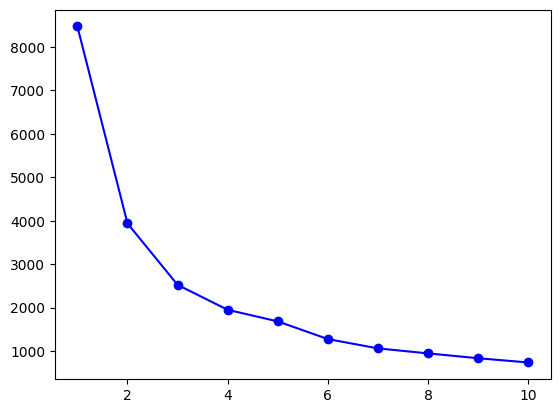

In [47]:
plt.plot( kArr , inertia_arr , 'bo-')

In [48]:
k_optimal = 4
kobj = KMeans(n_clusters = k_optimal , random_state = 42)
data["cluters"] = kobj.fit_predict(data_scaled)

In [49]:
data

,QUANTITYORDERED,PRICEEACH,PRICEEACH,cluters
0,30,95.70,95.70,2
1,34,81.35,81.35,2
2,41,94.74,94.74,1
3,45,83.26,83.26,1
4,49,100.00,100.00,1
...,...,...,...,...
2818,20,100.00,100.00,2
2819,29,100.00,100.00,2
2820,43,100.00,100.00,1
2821,34,62.24,62.24,0
